# Back Propagation Neural Network

> BP using libraries - December 2024
>
> NEC First Assignment - Universitat Rovira i Virgili
>
> *Andrea Pujals Bocero*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read and parse the .csv features file for A1-synthetic
df = pd.read_csv('A1-synthetic.csv', decimal=".")
df.describe()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,z
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.968392,11.005370,0.511468,2.417192,100.108795,2.726705,78.148504,0.313000,13.868300,6.367773
std,28.418028,0.584090,0.283292,1.147284,4.893623,0.275193,5.016537,0.463946,3.253272,3.841009
min,-49.942910,10.000103,0.000147,1.002395,85.147019,1.974029,62.554174,0.000000,10.100000,-0.791114
25%,-23.938244,10.510135,0.267591,1.258367,96.934414,2.540117,74.814175,0.000000,10.861926,3.124304
50%,2.852507,10.990934,0.515436,3.042135,99.920497,2.710712,78.101481,0.000000,13.089869,5.665139
75%,25.494062,11.517569,0.757415,3.498211,103.482385,2.902578,81.604561,1.000000,16.366096,9.260205
max,49.889593,11.999189,0.999727,3.999776,116.239538,3.600914,94.502170,1.000000,22.033951,16.080230


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.describe()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,z
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.509967,0.502863,0.511535,0.472011,0.481202,0.462648,0.488116,0.313000,0.315763,0.424322
std,0.284657,0.292178,0.283411,0.382762,0.157389,0.169153,0.157022,0.463946,0.272606,0.227665
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.260483,0.255133,0.267556,0.085399,0.379107,0.347958,0.383749,0.000000,0.063845,0.232075
50%,0.528840,0.495642,0.515506,0.680507,0.475146,0.452818,0.486644,0.000000,0.250535,0.382676
75%,0.755635,0.759080,0.757586,0.832666,0.589703,0.570753,0.596294,1.000000,0.525065,0.595763
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
from sklearn.model_selection import train_test_split

#separate the data into features and target

#x, y = df.drop(["z"], axis=1), df2[["z"]]
x, y = df_scaled.drop(["z"], axis=1), df_scaled[["z"]]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
#print the training and testing sets shape
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(800, 9) (800, 1)
(200, 9) (200, 1)


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Define the model with an Input layer
model = Sequential([
    Input(shape=(x_train.shape[1],)),  # Explicitly specify the input shape
    Dense(16, activation="relu"),     # Hidden layer 1
    Dense(8, activation="relu"),      # Hidden layer 2
    Dense(1)                          # Output layer
])

# Uncomment the optimizer to use

# SGD Optimizer
# sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
# model.compile(optimizer=sgd, loss="mse", metrics=["mae"])

# Adam Optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss="mse", metrics=["mae"])

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=100,  # Number of epochs
    verbose=2    # Show progress per epoch
)

# Evaluate the model
mse, mae = model.evaluate(x_test, y_test)
print(f"Test MSE: {mse:.4f}, Test MAE: {mae:.4f}")

# Predict
y_pred = model.predict(x_test)

# Convert y_test and y_pred to numpy arrays
import numpy as np
y_test_np = np.array(y_test).flatten()
y_pred_np = np.array(y_pred).flatten()

# Compute MAPE
epsilon = 1e-7  # To avoid division by zero
mape = (np.abs((y_test_np - y_pred_np) / (y_test_np + epsilon))).mean() * 100
print(f"Test MAPE: {mape:.2f}%")

Epoch 1/100
25/25 - 1s - 38ms/step - loss: 0.1575 - mae: 0.3208 - val_loss: 0.0761 - val_mae: 0.2096
Epoch 2/100
25/25 - 0s - 4ms/step - loss: 0.0381 - mae: 0.1477 - val_loss: 0.0259 - val_mae: 0.1341
Epoch 3/100
25/25 - 0s - 4ms/step - loss: 0.0207 - mae: 0.1159 - val_loss: 0.0168 - val_mae: 0.1015
Epoch 4/100
25/25 - 0s - 3ms/step - loss: 0.0139 - mae: 0.0918 - val_loss: 0.0124 - val_mae: 0.0887
Epoch 5/100
25/25 - 0s - 5ms/step - loss: 0.0109 - mae: 0.0817 - val_loss: 0.0102 - val_mae: 0.0806
Epoch 6/100
25/25 - 0s - 3ms/step - loss: 0.0089 - mae: 0.0738 - val_loss: 0.0084 - val_mae: 0.0737
Epoch 7/100
25/25 - 0s - 3ms/step - loss: 0.0076 - mae: 0.0688 - val_loss: 0.0074 - val_mae: 0.0691
Epoch 8/100
25/25 - 0s - 3ms/step - loss: 0.0065 - mae: 0.0636 - val_loss: 0.0065 - val_mae: 0.0649
Epoch 9/100
25/25 - 0s - 3ms/step - loss: 0.0057 - mae: 0.0595 - val_loss: 0.0057 - val_mae: 0.0614
Epoch 10/100
25/25 - 0s - 3ms/step - loss: 0.0051 - mae: 0.0563 - val_loss: 0.0051 - val_mae: 0.058

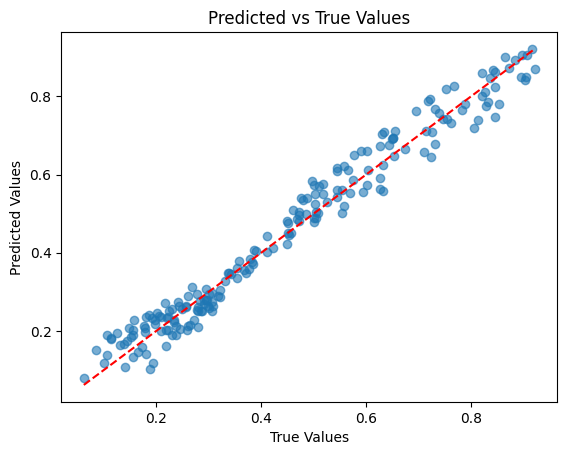

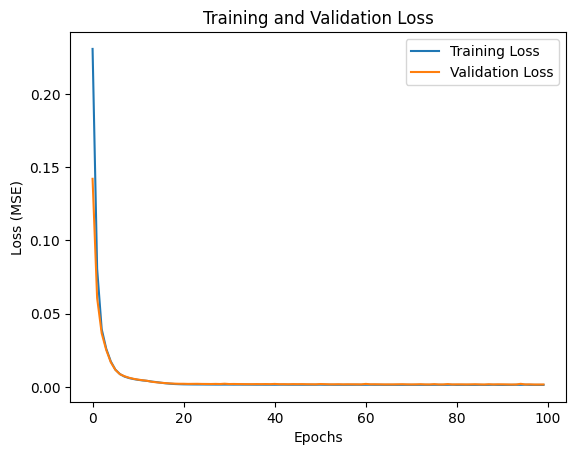

In [9]:
# Visualize predictions
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs True Values")
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()